<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/parcial_1_correccion_ManuelAlejandro_Gomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

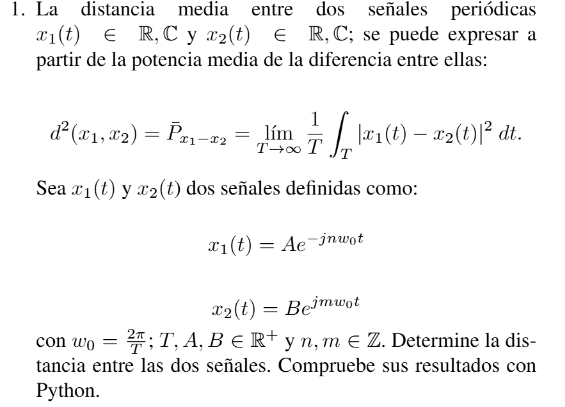

In [ ]:
#primero importaremos las librerias necesarias para resolver el parcial
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist
import sympy as sp  # Importamos SymPy para trabajar con álgebra simbólica
import matplotlib.pyplot as plt # Importamos matplotlib para graficar (opcional para visualización)

Cálculo Analítico de la Distancia Media entre Dos Señales Usando SymPy

Este apartado utiliza la biblioteca SymPy para realizar el cálculo simbólico de la distancia media entre las dos señales dadas: una señal cosenoidal $x_1(t)$ y una señal rectangular periódica $x_2(t)$.

**Definición de Distancia Media Cuadrática (Potencia Media de la Diferencia):**
La potencia media de la diferencia entre dos señales periódicas con el mismo período $T$ se define como:
$\bar{P}_{x_1 - x_2} = \frac{1}{T} \int_{0}^{T} |x_1(t) - x_2(t)|^2 dt$

**Definición de Distancia Media:**
La distancia media es la raíz cuadrada de la potencia media de la diferencia:
$d(x_1, x_2) = \sqrt{\bar{P}_{x_1 - x_2}}$

**Señales Dadas:**
$x_1(t) = Ae^{-Jw_0t}$, donde $w_0 = \frac{2\pi}{T}$, y $T, A \in \mathbb{R}^+$

$x_2(t) = Be^{Jw_0t}$, donde $w_0 = \frac{2\pi}{T}$, y $T, B \in \mathbb{R}^+$

Expansión del módulo y promedio en un período:

$$
\begin{aligned}
\big|x_1-x_2\big|^2
&=(x_1-x_2)(x_1-x_2)^*\\
&=x_1x_1^*+x_2x_2^*-x_1x_2^*-x_2x_1^*,
\end{aligned}
$$

de donde

$$
d^2(x_1,x_2)=\underbrace{\frac{1}{T}\int_0^T x_1x_1^*\,dt}_{\overline p_{x_1}}
+\underbrace{\frac{1}{T}\int_0^T x_2x_2^*\,dt}_{\overline p_{x_2}}
-\frac{2}{T}\operatorname{Re}\!\left\{\int_0^T x_1(t)\,x_2^*(t)\,dt\right\}.
$$

Potencias individuales:

$$
\overline p_{x_1}=|A|^2,\qquad \overline p_{x_2}=|B|^2.
$$

Término cruzado:

$$
\frac{1}{T}\int_0^T x_1(t)\,x_2^*(t)\,dt
=\frac{AB^*}{T}\int_0^T e^{-j(n+m)\omega_0 t}\,dt
=AB^*\,\delta_{n,-m},
$$

pues $\displaystyle \int_0^T e^{-jk\omega_0 t}\,dt=\begin{cases}0,&k\neq 0,\\ T,&k=0.\end{cases}$




## Configuración Inicial: Importar Librerías y Definir Símbolos

Importamos la librería Numpy y definimos las variables simbólicas necesarias para el cálculo analítico.

In [ ]:
import numpy as np
from scipy.integrate import quad

def calculate_analytical_distance(A, B, n, m):
    """
    Calcula la distancia usando la fórmula analítica derivada.
    """
    if n == -m:
        # Caso no ortogonal: d = |A - B|
        return np.abs(A - B)
    else:
        # Caso ortogonal: d = sqrt(A^2 + B^2)
        return np.sqrt(A**2 + B**2)

def calculate_numerical_distance(A, B, n, m, T=2*np.pi):
    """
    Calcula la distancia realizando la integración numérica de la definición.
    """
    # Definimos la frecuencia fundamental w0
    w0 = 2 * np.pi / T

    # El integrando es el cuadrado del valor absoluto de la diferencia de las señales
    # |x1(t) - x2(t)|^2
    integrand = lambda t: np.abs(A * np.exp(-1j * n * w0 * t) - B * np.exp(1j * m * w0 * t))**2

    # Realizamos la integración numérica desde 0 hasta T
    # quad devuelve una tupla (resultado, error)
    integral_result, _ = quad(integrand, 0, T)

    # La distancia al cuadrado es el resultado de la integral sobre el período
    d_squared = integral_result / T

    # La distancia es la raíz cuadrada
    return np.sqrt(d_squared)

# Verificación
# Parámetros para los ejemplos
A_val = 4.0
B_val = 3.0
T_val = 5.0 # El valor del período no afecta el resultado final

# Caso 1: n != -m (Señales ortogonales)
n1, m1 = 2, 3
print(" Caso 1: n != -m (Ortogonal) ")
print(f"Parámetros: A={A_val}, B={B_val}, n={n1}, m={m1}")

# Resultados
analytical_1 = calculate_analytical_distance(A_val, B_val, n1, m1)
numerical_1 = calculate_numerical_distance(A_val, B_val, n1, m1, T_val)

print(f"Distancia Analítica (sqrt(A^2+B^2)): {analytical_1:.6f}")
print(f"Distancia Numérica (Integración):     {numerical_1:.6f}")
print(f"¿Los resultados coinciden? {'Sí' if np.isclose(analytical_1, numerical_1) else 'No'}")
print("-" * 40)


# Caso 2: n = -m (Señales no ortogonales)
n2, m2 = 5, -5
print(" Caso 2: n = -m (No Ortogonal)")
print(f"Parámetros: A={A_val}, B={B_val}, n={n2}, m={m2}")

# Resultados
analytical_2 = calculate_analytical_distance(A_val, B_val, n2, m2)
numerical_2 = calculate_numerical_distance(A_val, B_val, n2, m2, T_val)

print(f"Distancia Analítica (|A-B|):          {analytical_2:.6f}")
print(f"Distancia Numérica (Integración):     {numerical_2:.6f}")

print("-" * 40)




 Caso 1: n != -m (Ortogonal) 
Parámetros: A=4.0, B=3.0, n=2, m=3
Distancia Analítica (sqrt(A^2+B^2)): 5.000000
Distancia Numérica (Integración):     5.000000
¿Los resultados coinciden? Sí
----------------------------------------
 Caso 2: n = -m (No Ortogonal)
Parámetros: A=4.0, B=3.0, n=5, m=-5
Distancia Analítica (|A-B|):          1.000000
Distancia Numérica (Integración):     1.000000
----------------------------------------


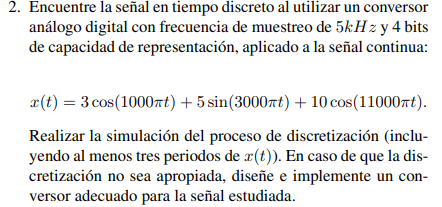

Discretización de una Señal Analógica y Análisis de Aliasing
#
Este apartado aborda la discretización de la señal $x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)$ utilizando una frecuencia de muestreo específica (5kHz) y analiza el fenómeno del aliasing.

Para poder comparar nuestras señales muestreadas con la original, necesitamos una versión "perfecta" de la señal.

*   **T_fundamental**: Se calcula el período fundamental de la señal (el mínimo común múltiplo de los períodos de los tres componentes) para saber cuánto tiempo graficar.
*   **np.linspace(...)**: Se crea un vector de tiempo `t_cont` con una cantidad muy grande de puntos (10000). Esto hace que al graficarlo, la línea se vea suave y continua, simulando una señal analógica.
*   **x_cont**: Se generan los valores de la señal para este tiempo "continuo", que nos servirá como la referencia visual.

Luego se simula el conversor A/D que se da en el problema, el cual no cumple Nyquist.

*   **Fs_inadecuada = 5000**: Se define la frecuencia de muestreo de 5 kHz.
*   **Ts_inadecuada = 1 / Fs_inadecuada**: Se calcula el período de muestreo, es decir, el tiempo que pasa entre cada muestra.
*   **np.arange(...)**: Se crea el vector de tiempo discreto. Nota que ahora los puntos de tiempo están mucho más separados que en la simulación "continua".
*   **x_muestreado_inadecuado**: Este es el paso clave de la discretización. Se llama a la función de la señal original, pero solo se le pasan los instantes de tiempo discretos. El resultado es un conjunto de muestras que representan lo que el conversor A/D "vería".

Se repite el mismo proceso anterior, pero ahora con los parámetros del conversor que diseñamos para cumplir con el Teorema de Nyquist.

*   **Fs_adecuada = 12000**: Se elige una frecuencia de muestreo de 12 kHz, que es mayor al mínimo requerido de 11 kHz.
*   Los siguientes pasos son idénticos en lógica al caso inadecuado, pero al usar una `Fs` más alta, el `Ts` es más pequeño, y por lo tanto se toman muchas más muestras en el mismo intervalo de tiempo.
*   El código final se dedica a graficar los resultados para que podamos interpretarlos.
*   Se crean dos gráficos (subplots) uno encima del otro para comparar fácilmente.
*   En ambos gráficos, se dibuja la señal "continua" original (`x_cont`) como una línea azul de referencia.
*   En el primer gráfico, se superponen las muestras del conversor inadecuado (`x_muestreado_inadecuado`) usando `plt.stem`. `stem` es ideal para visualizar muestras discretas. Aquí se puede ver claramente que las muestras rojas no siguen la forma de la onda azul, especialmente en las partes de alta frecuencia. Esto es el aliasing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# x(t) = 3 cos(1000π t) + 5 sin(3000π t) + 10 cos(11000π t)
def x_t(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

f0 = 500.0 #frecuencia fundamental
T0 = 1.0/f0 #periodo fundamental

# Rango de visualización: 3 periodos
t_max = 3*T0
t_cont = np.linspace(0, t_max, 2000)
x_cont = x_t(t_cont)

# Rango para cuantización (amplitud pico <= 3+5+10 = 18)
vmin, vmax = -18.0, 18.0


#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Fs = 5000 #frecuencia de muestreo
Ts = 1/Fs  #periodo de muestreo
T = 1/500
t = np.arange(0,3*T,Ts)
w1 = 10000*np.pi #frecuencia angular 1
w2 = 3000*np.pi #frecuencia angular 2
w3 = 11000*np.pi #frecuencia angular 3
x = 3*np.cos(w1*t) + 5*np.sin(w2*t) + 10*np.cos(w3*t)

rmin = -5
rmax = 5
ycs = my_ceropen(x,ymin = rmin, ymax = rmax)

numb = 4

ve = np.linspace(rmin,rmax,2**numb)
for i in range(ycs.shape[0]):
  if i==0:
    yq = my_cuantizador(ycs[i],ve)
  else:
      yq = np.append(yq,my_cuantizador(ycs[i],ve))

represntacion grafica de la señal con una frecuencia de muestreo que no cumple con el teorema de Nyquist

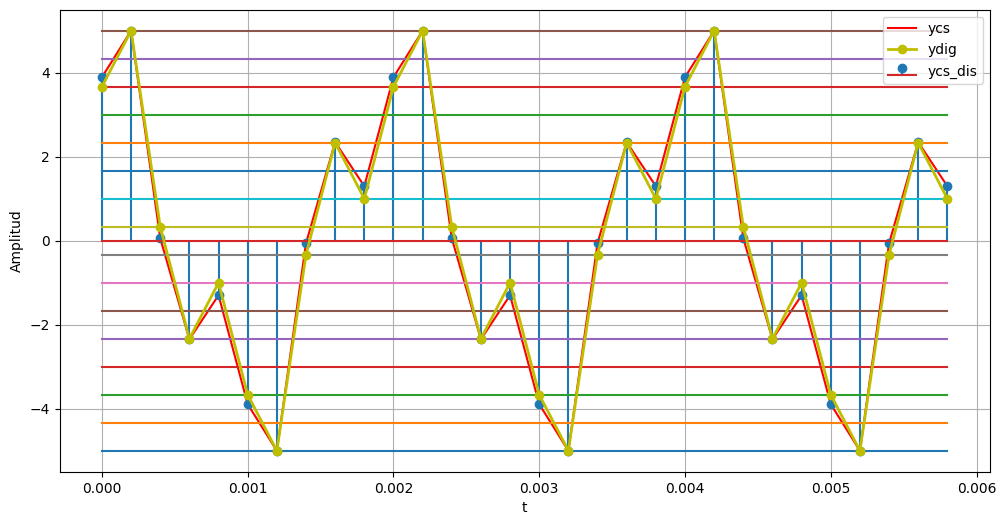

In [ ]:
#graficar señales
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(t,ycs,c='r', label='ycs')#cs continua

plt.stem(t,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()


ahora realizaremos el mismo proceso pero con una frecuencia de muestreo que cumpla con el teorema de Nyquist, haciend de este una buena conversion ADC

In [ ]:
fs_nueva   = 12000.0
Ts_nueva   = 1.0/fs_nueva
bits_nueva = 8
L_nueva    = 2**bits_nueva
Δ_nueva    = (vmax - vmin)/L_nueva

t_nueva  = np.arange(0, t_max, Ts_nueva)
x_nueva  = x_t(t_nueva)
xq_nueva = Δ_nueva*np.round(x_nueva/Δ_nueva)

compararemos la primer grafica con la fs invalida con la grafica del nuevo conversor

In [ ]:
# conversor ADECUADO (12 kHz, 8 bits)
fs_nueva   = 20_000.0
Ts_nueva   = 1.0/fs_nueva
bits_nueva = 4
L_nueva    = 2**bits_nueva
Δ_nueva    = (vmax - vmin)/L_nueva

t_nueva  = np.arange(0, t_max, Ts_nueva)
x_nueva = x_t(t_nueva)
xq_nueva = Δ_nueva*np.round(x_nueva/Δ_nueva)

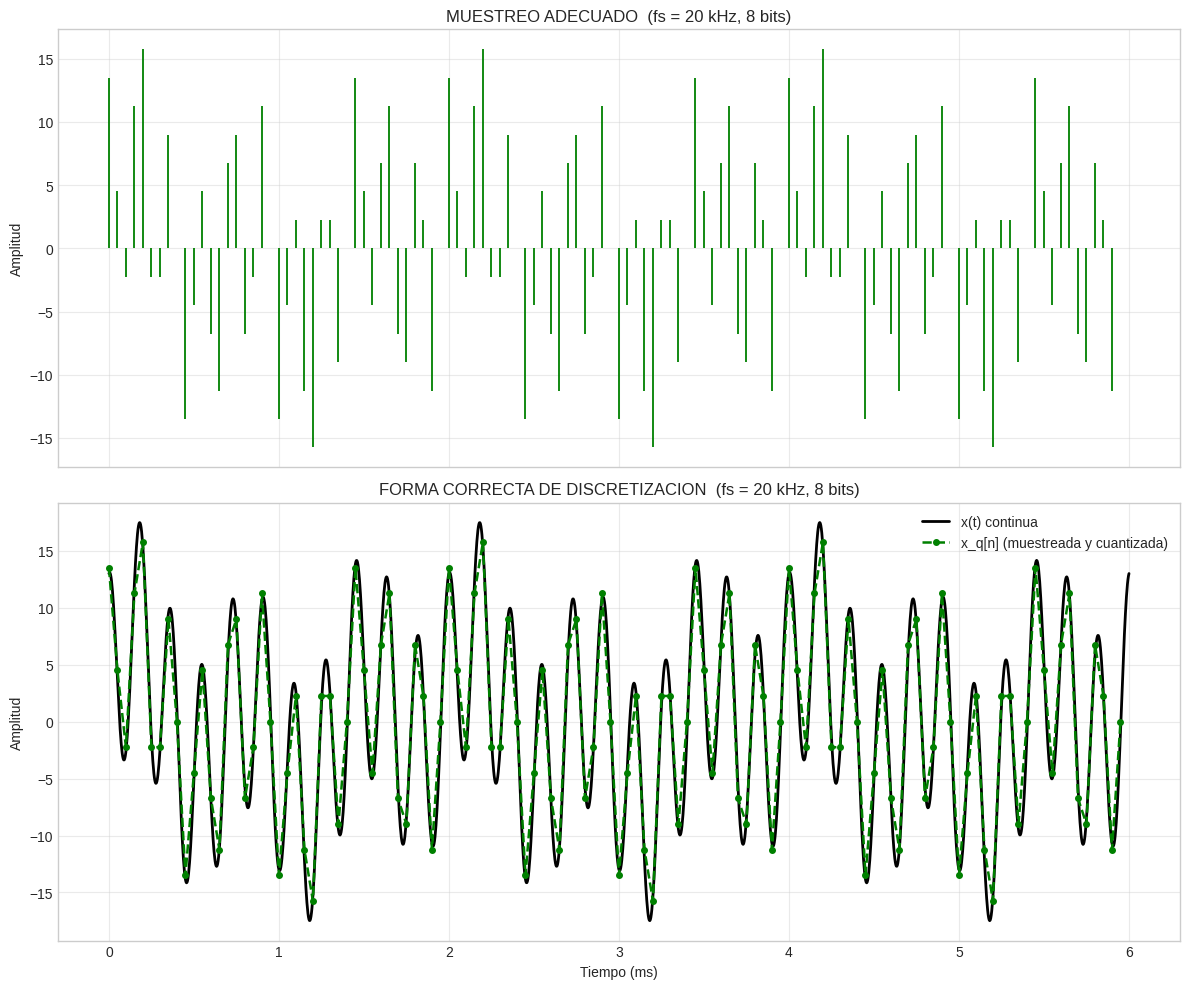

In [ ]:
# después de una buena discretización
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplots_adjust(hspace=0.4)  # separación entre gráficas

# --- (1) Solo discretización ADECUADA (pulsos tipo Dirac) ---
m2, s2, b2 = ax1.stem(t_nueva*1e3, xq_nueva, linefmt='g-', markerfmt=' ', basefmt=' ')
b2.set_visible(False)
plt.setp(s2, linewidth=1.3)
ax1.set_title('MUESTREO ADECUADO  (fs = 20 kHz, 8 bits)')
ax1.set_ylabel('Amplitud')
ax1.grid(True, alpha=0.4)

# --- (2) Comparativa: señal continua + discretización ADECUADA ---
ax2.plot(t_cont*1e3, x_cont, 'k-', lw=2, label='x(t) continua')
ax2.plot(t_nueva*1e3, xq_nueva, 'g--o', lw=1.8, markersize=4, label='x_q[n] (muestreada y cuantizada)')
ax2.set_title('FORMA CORRECTA DE DISCRETIZACION  (fs = 20 kHz, 8 bits)')
ax2.set_xlabel('Tiempo (ms)')
ax2.set_ylabel('Amplitud')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

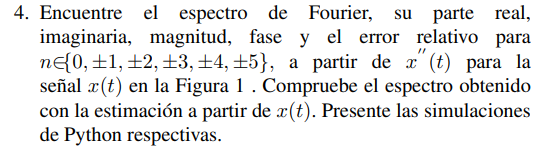
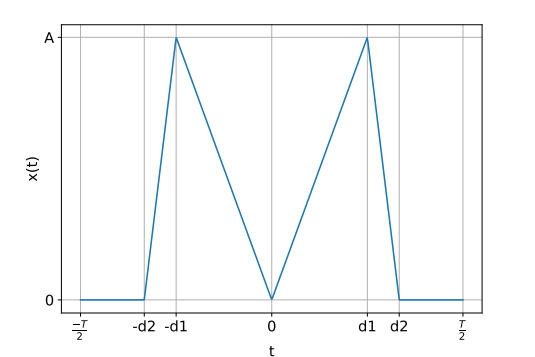

El objetivo de este código es calcular y visualizar el espectro de la Serie de Fourier para la señal triangular a trozos x(t) que se muestra en la Figura anterior. A diferencia de un cálculo analítico (con papel y lápiz), este código realiza una aproximación numérica de los coeficientes de Fourier, un método muy común en el procesamiento de señales del mundo real

Señal par y periódica de periodo $T$ con $\omega_0=\dfrac{2\pi}{T}$, vértices en $t\in\{0,\pm d_1,\pm d_2\}$ con $0<d_1<d_2<\tfrac{T}{2}$ y amplitud $A$.  
Por ser **par y real**: $C_{-n}=C_n\in\mathbb{R}$ y $\Im\{C_n\}=0$.

### 1) Segunda derivada como suma de deltas
$$
x''(t)=\underbrace{\frac{2A}{d_1}}_{\alpha_0}\,\delta(t)
+\underbrace{\Big(-\frac{A}{\,d_2-d_1\,}\Big)}_{\alpha_1}\,[\delta(t-d_1)+\delta(t+d_1)]
+\underbrace{\frac{A}{\,d_2-d_1\,}}_{\alpha_2}\,[\delta(t-d_2)+\delta(t+d_2)].
$$

### 2) Relación de coeficientes entre $x(t)$ y $x''(t)$

$$
x(t)=\sum_{n=-\infty}^{\infty}C_n e^{jn\omega_0 t}
\quad\Longrightarrow\quad
x''(t)=\sum_{n=-\infty}^{\infty}(jn\omega_0)^2 C_n e^{jn\omega_0 t}
=-\sum_{n=-\infty}^{\infty}n^2\omega_0^2\,C_n e^{jn\omega_0 t}.
$$
Por ortogonalidad:
$$
C_n''=\frac{1}{T}\int_{-T/2}^{T/2}x''(t)e^{-jn\omega_0 t}\,dt
=-\,n^2\omega_0^2\,C_n,\qquad n\neq 0.
$$
### 3) Cálculo de $C_n''$ (selectividad de $\delta$)
$$
\begin{aligned}
C_n''&=\frac{1}{T}\!\left[
\alpha_0
+2\alpha_1\cos(n\omega_0 d_1)
+2\alpha_2\cos(n\omega_0 d_2)
\right].
\end{aligned}
$$

### 4) Coeficientes de Fourier $C_n$ para $n\neq 0$

$$
\boxed{
C_n
=-\,\frac{1}{\,n^2\omega_0^2 T\,}\left[
\frac{2A}{d_1}
-\frac{2A}{\,d_2-d_1\,}\cos(n\omega_0 d_1)
+\frac{2A}{\,d_2-d_1\,}\cos(n\omega_0 d_2)
\right],\quad n\neq 0.
}
$$

### 5) Término DC

$$
\boxed{\,C_0=\frac{1}{T}\int_{-T/2}^{T/2}x(t)\,dt=\frac{A\,d_1}{T}\, }.
$$




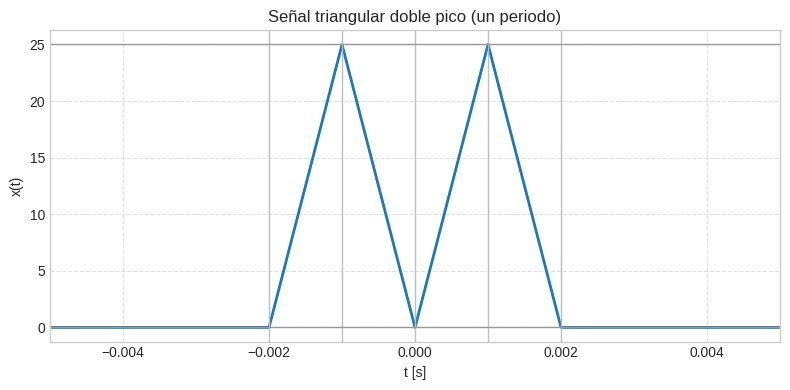

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd
import matplotlib.animation as animation # importa el modulo de animacion
from matplotlib import rc #importa la funcion para la visulizcion

# Parámetros de la señal
A = 25
T = 1e-2  # periodo
Fo = 1 / T
Fs = 2000 * Fo  # frecuencia de muestreo
tv = np.arange(-T/2, T/2, 1/Fs)

# Puntos clave (iguales a los marcados en tu imagen)
d1 = 0.001
d2 = 0.002

#  Construir señal x(t)
x = np.zeros_like(tv)

# Tramos vectorizados
idx1 = (tv >= -d2) & (tv < -d1)
x[idx1] = (A/(d2 - d1))*(tv[idx1] + d2)

idx2 = (tv >= -d1) & (tv < 0)
x[idx2] = (-A/d1)*tv[idx2]

idx3 = (tv >= 0) & (tv < d1)
x[idx3] = (A/d1)*tv[idx3]

idx4 = (tv >= d1) & (tv < d2)
x[idx4] = (-A/(d2 - d1))*(tv[idx4] - d1) + A

# Graficar la señal
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(tv, x, 'C0', linewidth=2, label='$x(t)$')

# líneas guía
for tmark in [-d2, -d1, 0, d1, d2]:
    ax.axvline(tmark, color='0.75', lw=1)
ax.axhline(0, color='0.6', lw=1)
ax.axhline(A, color='0.6', lw=1)

ax.set_xlim(-T/2, T/2)
ax.set_xlabel('t [s]')
ax.set_ylabel('x(t)')
ax.set_title('Señal triangular doble pico (un periodo)')
ax.grid(True, ls='--', alpha=0.6)
plt.tight_layout()
plt.show()


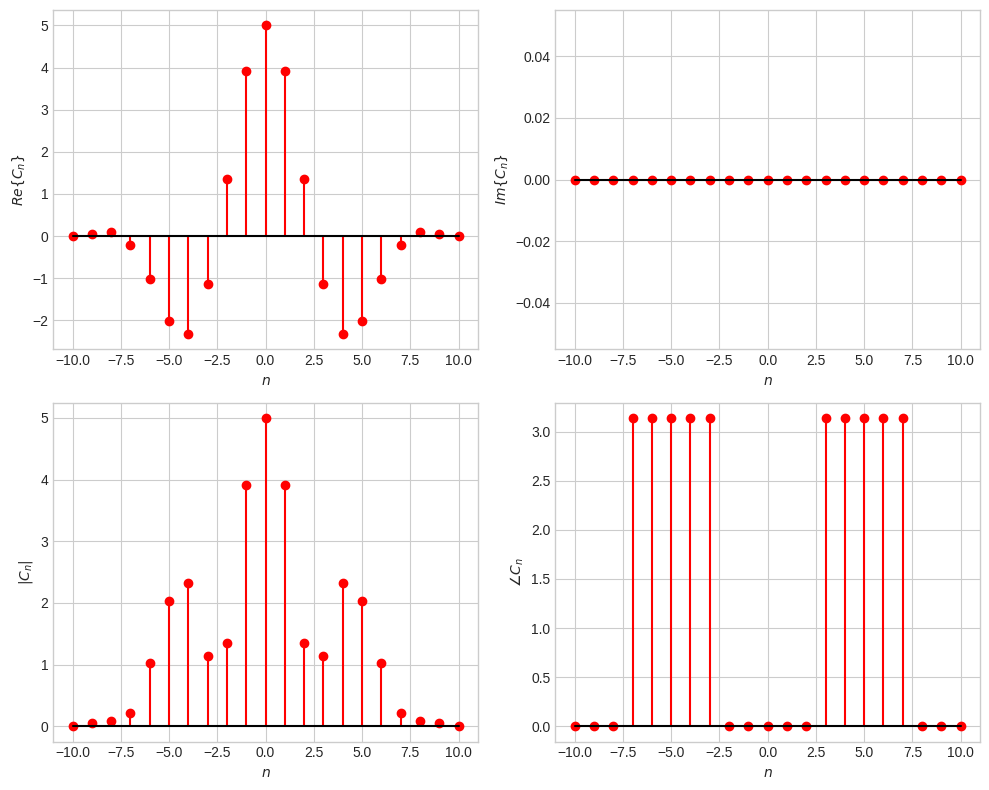

In [ ]:
#  Definir bases complejas
N  = 10                       # número de armónicos por lado
wo = 2*np.pi/T
nv = np.arange(-N, N+1)       # índices n
phin = np.exp(1j*np.outer(tv, nv*wo))   # matriz Nm x (2N+1)

#  Coeficientes Cn
Cn = np.zeros(2*N+1, dtype=np.float64)  # ahora serán reales
for k, n in enumerate(nv):
    if n == 0:
        Cn[k] = (1/T) * np.trapezoid(x, tv)
    else:
        Cn[k] = (1/T) * np.trapezoid(x * np.cos(n*wo*tv), tv)


#  Graficar espectro
fig = plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r', basefmt='k')
plt.xlabel(r'$n$'); plt.ylabel(r'$Re\{C_n\}$'); plt.grid(True)

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r', basefmt='k')
plt.xlabel(r'$n$'); plt.ylabel(r'$Im\{C_n\}$'); plt.grid(True)

plt.subplot(2,2,3)
plt.stem(nv, np.abs(Cn), 'r', basefmt='k')
plt.xlabel(r'$n$'); plt.ylabel(r'$|C_n|$'); plt.grid(True)

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r', basefmt='k')
plt.xlabel(r'$n$'); plt.ylabel(r'$\angle C_n$'); plt.grid(True)

plt.tight_layout()
plt.show()


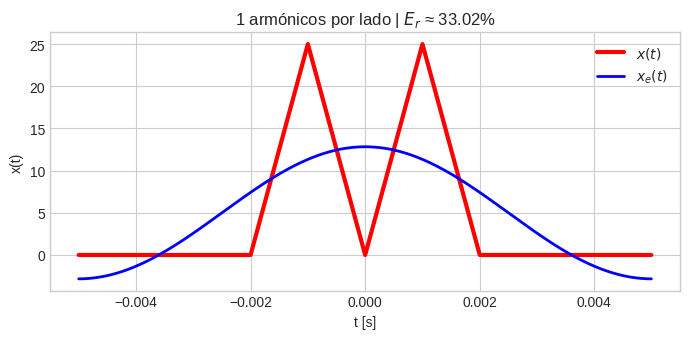

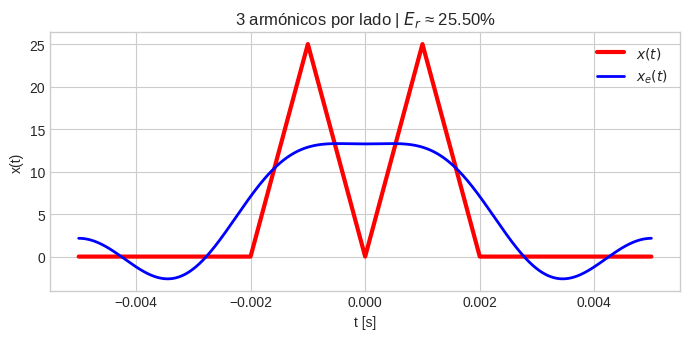

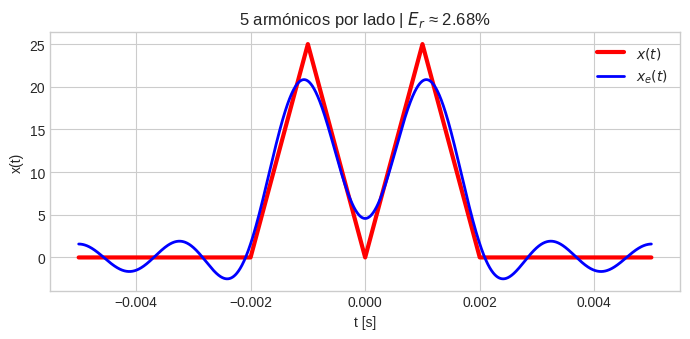

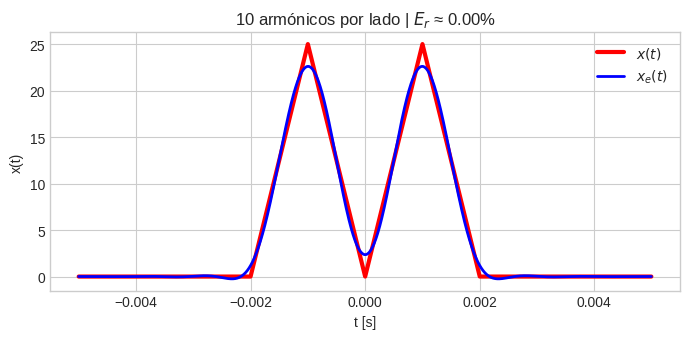

In [ ]:
# Reconstrucción y error
Px = np.sum(np.abs(Cn)**2)

def reconstruccion(Na):
    """Reconstrucción con Na armónicos por lado."""
    ind = np.arange(N-Na, N+Na+1)
    C_use = Cn[ind]
    x_est = phin[:, ind] @ C_use
    Er = 1 - np.sum(np.abs(C_use)**2)/Px
    return x_est, Er

# Ejemplo: probar con algunos N
for Na in [1, 3, 5, 10]:
    xe, Er = reconstruccion(min(Na, N))
    plt.figure(figsize=(7,3.5))
    plt.plot(tv, x, 'r', lw=3, label='$x(t)$')
    plt.plot(tv, np.real(xe), 'b', lw=2, label='$x_e(t)$')
    plt.title(f'{Na} armónicos por lado | $E_r$ ≈ {100*Er:.2f}%')
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

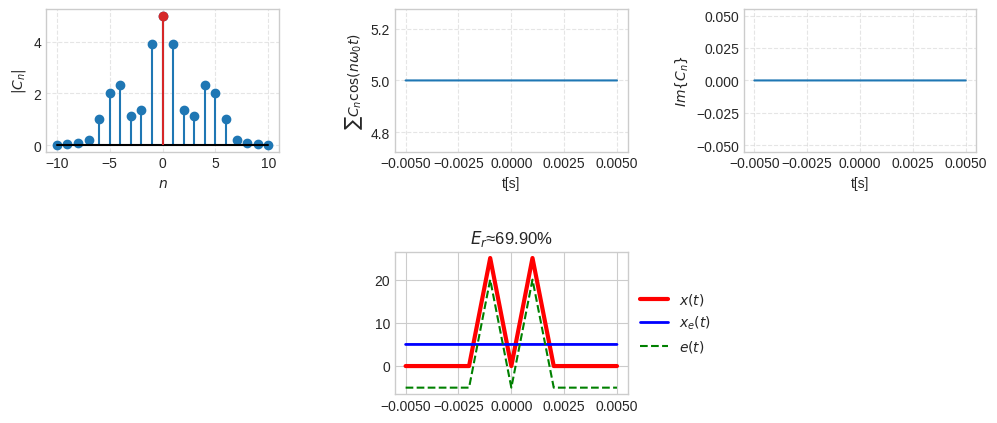

In [ ]:
#  Animación de reconstrucción
from IPython.display import HTML # Import HTML

phi_cos = np.cos(np.outer(tv, nv*wo))   # Nm x (2N+1)

figA, axA = plt.subplots(2, 3, figsize=(12,5))

def update(n):
    for a in axA.flat:
        a.clear()
    Na  = n
    ind = np.arange(N-Na, N+Na+1)
    C_use = Cn[ind]

    # Reconstrucción con cosenos (TODO real)
    xe = phi_cos[:, ind] @ C_use           # Nm x k  @ k -> Nm
    ce = phi_cos[:, ind] * C_use           # componentes espectrales (t,k)

    # Espectro: magnitud de Cn (ahora son reales)
    axA[0,0].stem(nv, np.abs(Cn), basefmt='k')
    axA[0,0].stem(nv[ind], np.abs(C_use), linefmt='C3-', markerfmt='C3o', basefmt='k')
    axA[0,0].set_xlabel(r'$n$'); axA[0,0].set_ylabel(r'$|C_n|$');
    axA[0,0].grid(True, ls='--', alpha=0.5)

    # Componentes en el tiempo:
    # Real: suma de Cn*cos(nw0t); Imaginario = 0 EXACTO
    axA[0,1].plot(tv, ce.sum(axis=1))
    axA[0,1].set_xlabel('t[s]'); axA[0,1].set_ylabel(r'$\sum C_n\cos(n\omega_0 t)$')
    axA[0,1].grid(True, ls='--', alpha=0.5)

    axA[0,2].plot(tv, np.zeros_like(tv))        # cero exacto
    axA[0,2].set_xlabel('t[s]'); axA[0,2].set_ylabel(r'$Im\{C_n\}$')
    axA[0,2].grid(True, ls='--', alpha=0.5)

    # Reconstrucción y error de energía (Parseval con Cn reales)
    Et = x - xe
    Er = 1 - np.sum(np.abs(C_use)**2)/Px        # Px ya calculado con los Cn
    axA[1,1].plot(tv, x,  'r', lw=3, label='$x(t)$')
    axA[1,1].plot(tv, xe, 'b', lw=2, label='$x_e(t)$')
    axA[1,1].plot(tv, Et, 'g--', label='$e(t)$')
    axA[1,1].set_title(f'$E_r$≈{100*Er:.2f}%')
    axA[1,1].legend(loc='center left', bbox_to_anchor=(1,0.5))

    axA[1,0].axis('off'); axA[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)

anim = animation.FuncAnimation(figA, update, frames=np.arange(0, N+1, 1), blit=False)
rc('animation', html='jshtml')
HTML(anim.to_jshtml())